## Laboratory 2

### Statistical Inference EE 2102575:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/GabbySuwichaya/Statistical-Learning-EE575/blob/master/LAB2/main.ipynb)

- [Task 1. Neural network quiz](#task-1-neural-network-quiz)
- [Task 2. Implementatoin](#task-2-static-nn-vs-bnn-implementations)

Scoring

- [3 scores] Task 1. Neural Network Quiz
 
- [17 scores] Static NN Implementations  ... 
    
    1. [4 scores, if the model is correct] The first 3-5 layers are linear layers  + 1 activation (you can choose any function)

    2. [4 scores, if the data loading is correct]  Choose 5-10 features as the inputs (also gives the reason why) and 1 output for the house price. 

    3. [1 scores, if the data spliting is correct]  Split the `house-price` datasets into training 80% and testing 20%. In the training part, divide 10% of the training data for validation. 

    4. [3+3 scores, if the learning is correct] Show the progress of the training and validation losses.  

    5. [2 scores, if the results are reasonable] Perform the evaluation using MSE, MAE, and R^2 
    
 After you finished, please let me know and I will mark the codes...  


- [40 scores Homeworks]  BNN Implementations and compare with Static NN Homework

    1. [15 scores] BNN Model  
        - Bayesian Linear Model 
        - Bayesian Linear Layer
        - Gaussian Mixture Prior + any other auxiliary functions

    2. [10 scores] Training 
        - ELBO loss is correct 
        - Sampling is correct

    3. [4 scores] validation after each training 
        - Use reasonable measure to guage the results.

    4. [3+3 scores, if the learning is correct] Show the progress of the training and validation losses for both models.  

    5. [10 scores, if the results are reasonable] Perform the evaluation using MSE, MAE, and R^2 

--------------------------------------------------

#### Installing packages

In [1]:
# ! pip3 install torch torchvision torchaudio 
# ! pip install torchviz 
# ! pip install graphviz

## Task 1. Neural Network Quiz

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from PIL import Image
import matplotlib.pyplot as plt  
 
from torchviz import make_dot

In [3]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__() 
        self.fc1 = nn.Linear(10, 1)  
        self.fc2 = nn.Sigmoid()  
 
    def forward(self, x):  
        x = self.fc1(x) 
        x = self.fc2(x)  
        return x
     
# Move the model to the GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
simple_nn = SimpleNN() 

-----------------------------------------------

Q1. What is the number of learnable parameters in `SimpleNN` ?  Check this by coding and explain why

In [4]:
def count_parameters(model):
    ### BEGIN SOLUTION
    return sum(p.numel() for p in model.parameters() if p.requires_grad)  
    ### END SOLUTION

In [5]:
num_params = count_parameters(simple_nn)
print(num_params)

11


Explain in the cell below ...

-------------------------------------------------------------------------

Q2. Can you try to visualize the computational graph of `SimpleNN`? 

Hint! You can use `make_dot` imported from `torchviz` package

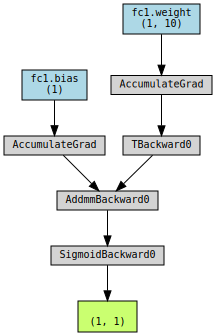

In [6]:
### BEGIN SOLUTION
from torchviz import make_dot
prediction = simple_nn(torch.ones(1,10))
make_dot(prediction, params=dict(simple_nn.named_parameters()))
### END SOLUTION

---------------------------------------------------------------------

Q3. Explain how the weights and biases are updated mathematically by showing the gradient calculation (just like in the Lecture 10).  

$f(x;w, b) = \frac{e^{w^T x + b}}{(1 + e^{w^T x + b})}$

$ \partial f = \frac{(1 + e^{w^T x + b}) \partial e^{w^T x + b} - e^{w^T x + b} \partial (1 + e^{w^T x + b}) }{(1 + e^{w^T x + b})^2}$

$\partial_{w_i} f(x;w, b) = \frac{x_i e^{w^T x + b}}{(1 + e^{w^T x + b})^2}$ 

$\partial_{b} f(x;w, b)  = \frac{e^{w^T x + b}}{(1 + e^{w^T x + b})^2}$ 

$w_i^{\text{new}} = w_i^{\text{old}} - \alpha \partial_{w_i} f(x;w) $

$b^{\text{new}} = b^{\text{old}} - \alpha \partial_{b} f(x;b) $

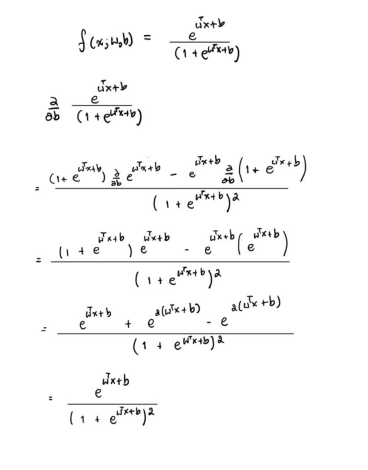

In [7]:
plt.figure(); Image=plt.imread("figures/grad_b.png"); plt.axis("off"); plt.imshow(Image); plt.tight_layout()

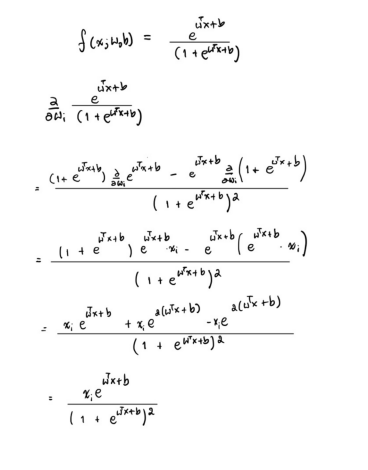

In [8]:
plt.figure(); Image=plt.imread("figures/grad_w.png"); plt.axis("off"); plt.imshow(Image); plt.tight_layout()

----------------------------------------------------------------------------------------

## Task 2. Static NN vs BNN Implementations  

Q4. Implement the following architectures for static DNN called `MyNN`. [17 scores]

    1. [4 scores, if the model is correct] The first 3-5 layers are linear layers  + 1 activation (you can choose any function)

    2. [4 scores, if the data loading is correct]  Choose 5-10 features as the inputs (also gives the reason why) and 1 output for the house price. 

    3. [1 scores, if the data spliting is correct]  Split the `house-price` datasets into training 80% and testing 20%. In the training part, divide 10% of the training data for validation. 

    4. [3+3 scores, if the learning is correct] Show the progress of the training and validation losses.  

    5. [2 scores, if the results are reasonable] Perform the evaluation using MSE, MAE, and R^2 

-----------------------------------------------------------------------------------------------------------
 

Q5. Implement a similar BNN called `MyBNN` with the same settings, and compare the results with `MyNN`. ...  

[40 scores Homeworks]  BNN Implementations and compare with Static NN Homework

    1. [15 scores] BNN Model  
        - Bayesian Linear Model 
        - Bayesian Linear Layer
        - Gaussian Mixture Prior + any other auxiliary functions

    2. [10 scores] Training 
        - ELBO loss is correct 
        - Sampling is correct

    3. [4 scores] validation after each training 
        - Use reasonable measure to guage the results.

    4. [3+3 scores, if the learning is correct] Show the progress of the training and validation losses for both models.  

    5. [10 scores, if the results are reasonable] Perform the evaluation using MSE, MAE, and R^2 

#### Customized data loader 

In [9]:
import torchvision.datasets as datasets
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [10]:
class CustomDataset(Dataset):
    def __init__(self, X_train_, y_train_, X_test_=None, y_test_=None, mode="Train"):
        self.training_data  = X_train_
        self.training_label = y_train_
        
        if mode == "Train":
            self.data  = X_train_
            self.label = y_train_
            self.length = X_train_.shape[0]

        elif  mode == "Test" or mode == "Valid":
            assert X_test_ is not None
            assert y_test_ is not None

            self.data   = X_test_
            self.label  = y_test_
            self.length = X_test_.shape[0]
 

        self.XScaler    = StandardScaler()
        self.training_data = self.XScaler.fit_transform(self.training_data).astype("float32")
        self.data          = self.XScaler.transform(self.data).astype("float32") 

        self.YScaler = StandardScaler()
        self.training_label = self.YScaler.fit_transform(self.training_label).astype("float32") 
        self.label          = self.YScaler.transform(self.label).astype("float32")

    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        sample = self.data[idx, :] 
        label  = self.label[idx] 
        return sample, label

In [11]:
foldername = "house-prices"

import zipfile 
with zipfile.ZipFile("house-prices-advanced-regression-techniques.zip","r") as zip_ref:
    zip_ref.extractall(foldername) 

Example usage

In [12]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd

foldername = "house-prices"
df = pd.read_csv('%s/train.csv' % foldername)  

Feat_List = ['HouseStyle']
df[['HouseStyle']] = df.loc[:,['HouseStyle']].apply(LabelEncoder().fit_transform)
X = df.loc[:, Feat_List].values
Y = df['SalePrice'].values.reshape(-1,1)  


X_train_, X_test_, y_train_, y_test_ = train_test_split(X, Y, test_size=0.2, random_state= 0) 
TestingData  = CustomDataset(X_train_, y_train_, X_test_, y_test_, mode="Test")

--------------------------------------------

Your code starts from here:

```
    from sklearn.preprocessing import LabelEncoder
    from sklearn.preprocessing import StandardScaler
    import pandas as pd

    foldername = "house-prices"
    df = pd.read_csv('%s/train.csv' % foldername)  

    Feat_List = ['HouseStyle', 'LotArea']
    df[['HouseStyle']] = df.loc[:,['HouseStyle']].apply(LabelEncoder().fit_transform)
    X = df.loc[:, Feat_List].values
    Y = df['SalePrice'].values.reshape(-1,1)  

```

In [13]:
import seaborn as sns

In [14]:
df = pd.read_csv('%s/train.csv' % foldername)   
col_list = df.select_dtypes(include = "object").columns 
df[col_list] = df.loc[:, col_list].apply(LabelEncoder().fit_transform) 

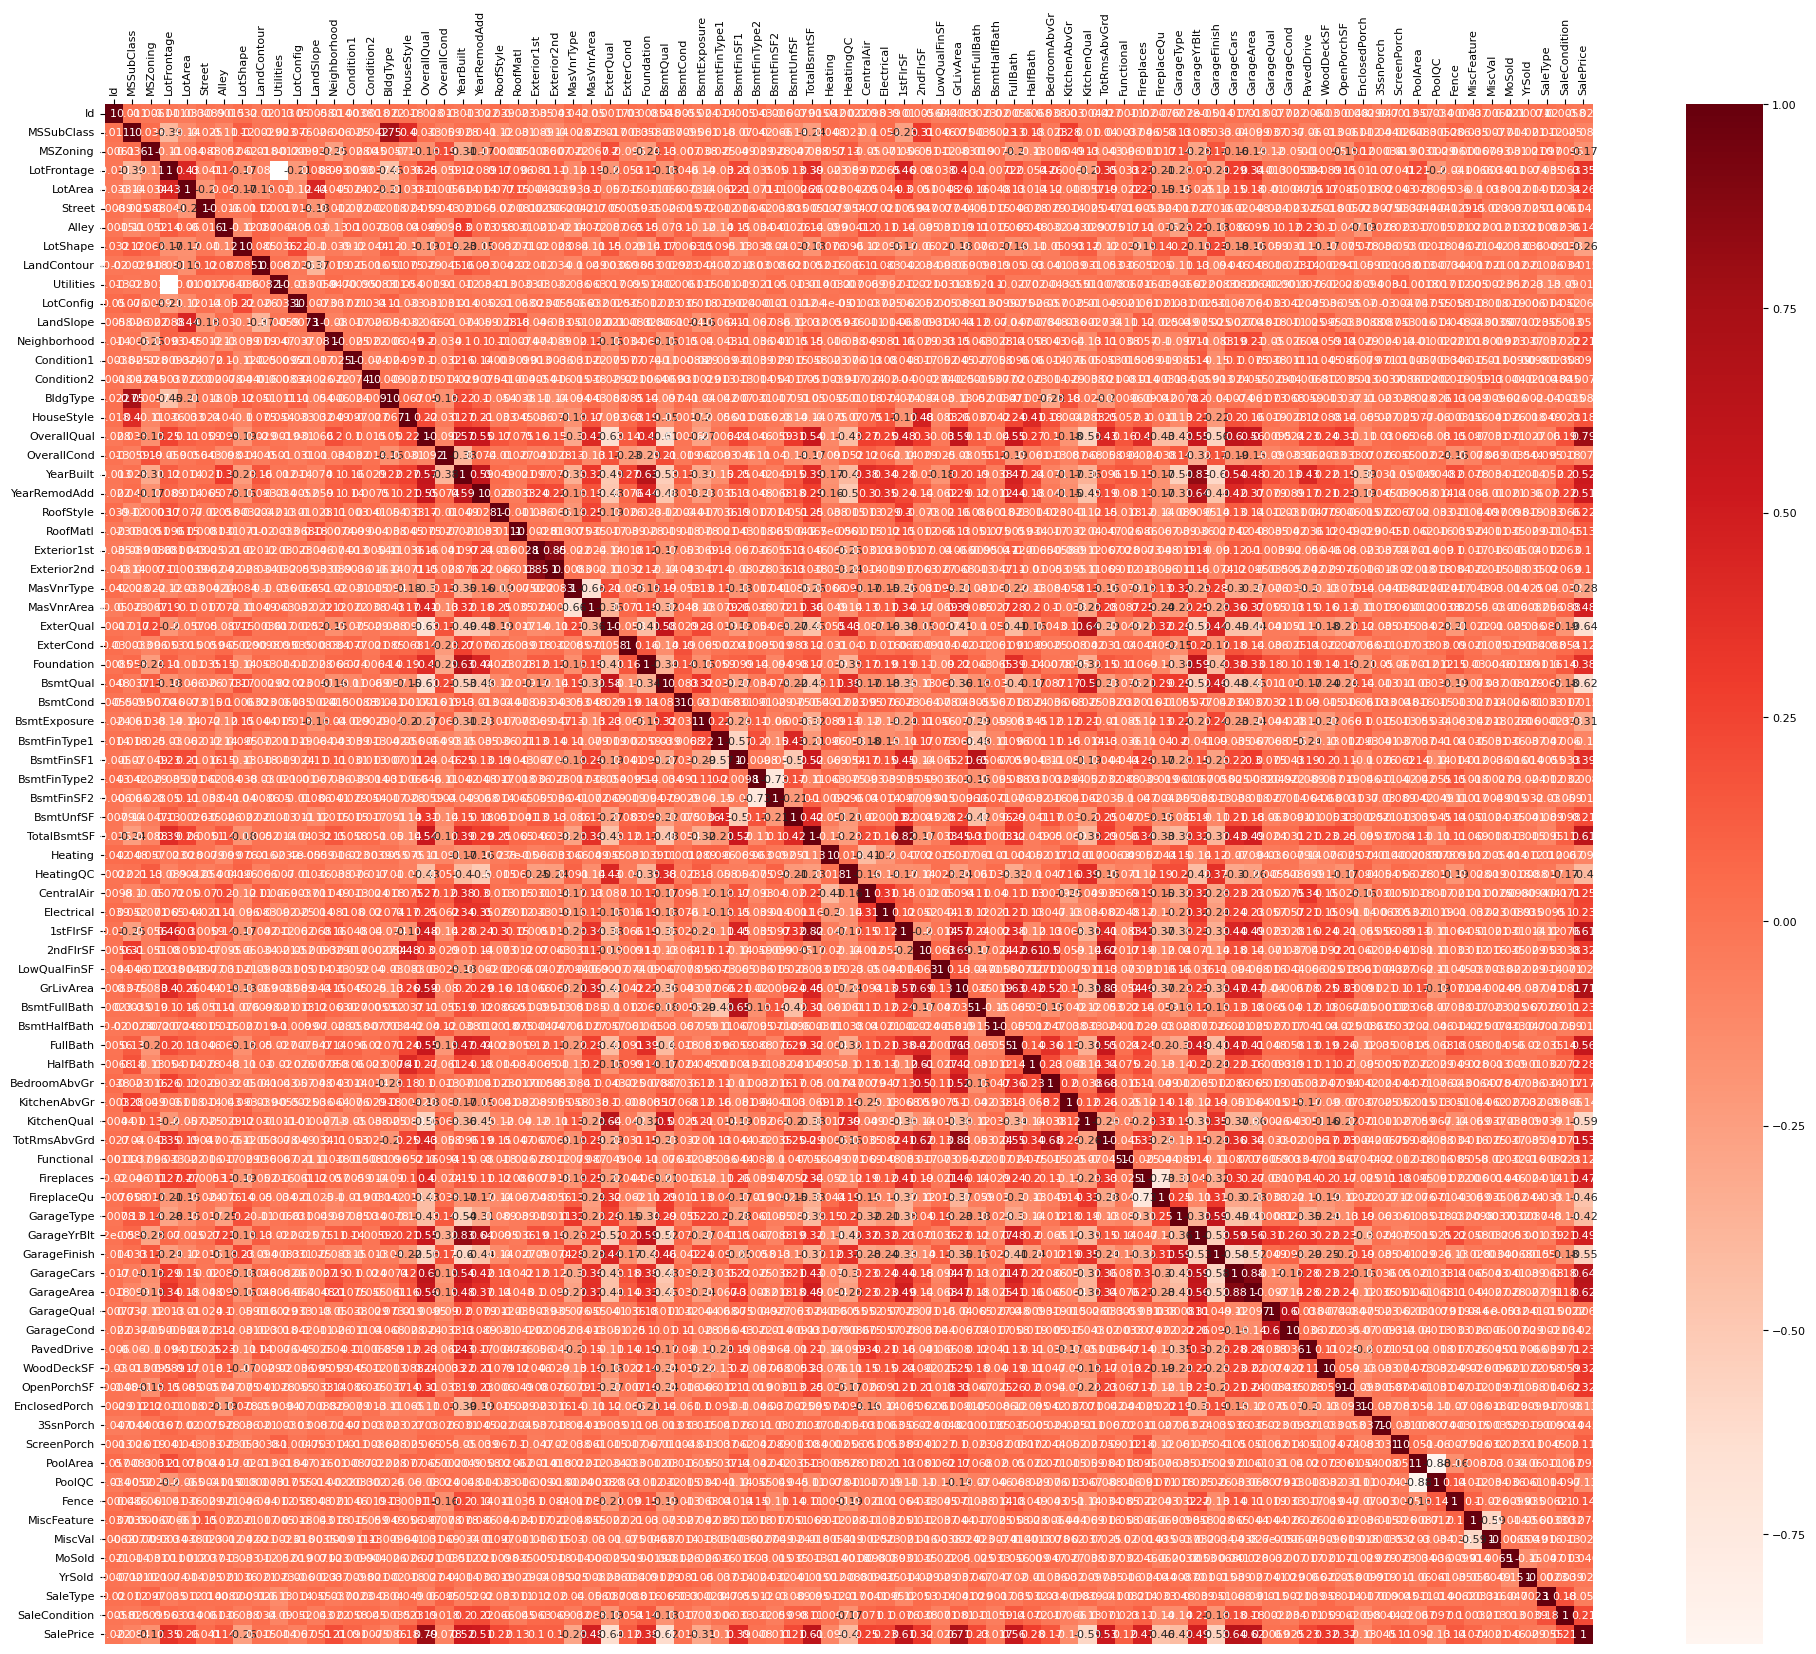

In [15]:
SMALL_SIZE = 8

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels

plt.figure(figsize=(24,20))
cor = df.corr()
g = sns.heatmap(cor, annot=True, cmap=plt.cm.Reds) 
g.axes.xaxis.set_ticks_position("top")
plt.setp(g.axes.get_xticklabels(), rotation=90)
plt.show()

In [16]:
cor["SalePrice"].abs().sort_values(ascending=False)[:20]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
ExterQual       0.636884
GarageArea      0.623431
BsmtQual        0.620886
TotalBsmtSF     0.613581
1stFlrSF        0.605852
KitchenQual     0.589189
FullBath        0.560664
GarageFinish    0.549247
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
FireplaceQu     0.459605
GarageType      0.415283
Name: SalePrice, dtype: float64

In [17]:
df_chosen = df.loc[:,['OverallQual', 'GrLivArea', 'GarageCars','ExterQual','GarageArea','BsmtQual','TotalBsmtSF','1stFlrSF','KitchenQual','FullBath','SalePrice']]
df_chosen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  1460 non-null   int64
 1   GrLivArea    1460 non-null   int64
 2   GarageCars   1460 non-null   int64
 3   ExterQual    1460 non-null   int64
 4   GarageArea   1460 non-null   int64
 5   BsmtQual     1460 non-null   int64
 6   TotalBsmtSF  1460 non-null   int64
 7   1stFlrSF     1460 non-null   int64
 8   KitchenQual  1460 non-null   int64
 9   FullBath     1460 non-null   int64
 10  SalePrice    1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [18]:
X = df_chosen.loc[:,['OverallQual', 'GrLivArea', 'GarageCars','ExterQual','GarageArea','BsmtQual','TotalBsmtSF','1stFlrSF','KitchenQual','FullBath']].values 
y = df_chosen['SalePrice'].values.reshape(-1,1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 0)
 
TestingData = CustomDataset(X_train, y_train, X_test, y_test, mode="Test")

In [20]:
class MyNN(nn.Module):
    def __init__(self, in_features=10, outfeatures=1):
        super().__init__() 
        self.fc1 = nn.Linear(in_features, 64)  
        self.fc2 = nn.Linear(64,  32)  
        self.fc3 = nn.Linear(32,  24)  
        self.fc4 = nn.Linear(24,  outfeatures)
        self.fc5 = nn.Sigmoid()  
        self.loss = nn.MSELoss() 
 
    def forward(self, x):  
        x = self.fc1(x) 
        x = self.fc2(x)  
        x = self.fc3(x)
        x = self.fc4(x)
        x = self.fc5(x)
        return x
    
    def mseloss(self, y_predict, y_gt):
        loss = self.loss(y_predict, y_gt)   
        return loss  
     
# Move the model to the GPU


In [21]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 

In [22]:
## Initialize the model and set the optimizer for training. 
from tqdm import tqdm
import torch.optim as optim
import os

in_features  = 10
out_features = 1


learning_rate = 0.0001
num_epoch     = 100 
batch_size    = 64

os.makedirs("weights", exist_ok=True)

In [23]:
## Initialize the model
myLinModel = MyNN(in_features=in_features, outfeatures=out_features)
myLinModel = myLinModel.to(device)


## Set the optimizer for training.
optimizer  = optim.Adam(myLinModel.parameters(), lr=learning_rate)

my_NN_training_loss = []
my_NN_validating_loss = [] 

X_train_, X_valid_, y_train_, y_valid_ = train_test_split(X_train, y_train, test_size=0.20)
TrainData   = CustomDataset(X_train_, y_train_, X_test_, y_test_, mode="Train")
ValidData   = CustomDataset(X_train_, y_train_, X_valid_, y_valid_, mode="Valid")

for ep in range(num_epoch): 


    



    av_valid_loss = 0
    av_mse_valid_loss = 0
    av_training_loss = 0 

    training_dataloader = DataLoader(TrainData, batch_size=batch_size, shuffle=True)   
    # Setting model for training
    myLinModel.train()
    pbar = tqdm(training_dataloader)
    for i, (X, y_gt) in enumerate(pbar):  

        X              = X.to(device)
        y_gt           = y_gt.to(device)
        y_pred         = myLinModel(X) 
        loss           = myLinModel.mseloss(y_pred, y_gt)

        loss.backward()  # Backward pass
        optimizer.step()  # Optimize parameters
        av_training_loss += loss.item()
        av_mse_training = av_training_loss/(i+1)

        pbar.set_description("[EP%d][%d] TRAIN Av. Loss = %0.2f" % (ep, i, av_mse_training))
     
    my_NN_training_loss.append(av_mse_training)


    state = {
        'epoch': ep,
        'state_dict': myLinModel.state_dict(),
        'optimizer': optimizer.state_dict(),
        'train_loss':my_NN_training_loss 
        }

    if ep % 1  == 0: 
        PATH =  'weights/weight_%03d.pt' % ep   
        torch.save(state, PATH) 
        #print('Saved model iteration' +  str(ep) + 'to -> ' + PATH)

    # Setting model for validating 
    valid_dataloader = DataLoader(ValidData, batch_size=batch_size, shuffle=True) 
    myLinModel.eval()
    pbar = tqdm(valid_dataloader)
    for i, data in enumerate(pbar):  

        X              = X.to(device)
        y_gt           = y_gt.to(device)

        with torch.no_grad():
            y_pred         = myLinModel(X)  
 
        valid_loss      = myLinModel.mseloss(y_pred, y_gt) 
 
        av_valid_loss += valid_loss.item()
        av_mse_valid  = av_valid_loss/(i + 1)
  

        pbar.set_description("-----[%d] VALID Av. Loss = %0.2f" % ( i, av_mse_valid))    

    print("Training ERROR %0.2f Valid ERROR: %0.2f" %(av_mse_training, av_mse_valid))
    my_NN_validating_loss.append(av_mse_valid) 

-----[3] VALID Av. Loss = 1.22: 100%|██████████| 4/4 [00:00<00:00, 1916.30it/s]


Training ERROR 1.20 Valid ERROR: 1.22


-----[3] VALID Av. Loss = 1.05: 100%|██████████| 4/4 [00:00<00:00, 2181.98it/s]


Training ERROR 1.15 Valid ERROR: 1.05


-----[3] VALID Av. Loss = 0.92: 100%|██████████| 4/4 [00:00<00:00, 1806.33it/s]


Training ERROR 1.10 Valid ERROR: 0.92


-----[3] VALID Av. Loss = 1.17: 100%|██████████| 4/4 [00:00<00:00, 1370.80it/s]


Training ERROR 1.05 Valid ERROR: 1.17


-----[3] VALID Av. Loss = 0.73: 100%|██████████| 4/4 [00:00<00:00, 1566.06it/s]


Training ERROR 0.99 Valid ERROR: 0.73


-----[3] VALID Av. Loss = 0.74: 100%|██████████| 4/4 [00:00<00:00, 1994.68it/s]


Training ERROR 0.94 Valid ERROR: 0.74


-----[3] VALID Av. Loss = 0.80: 100%|██████████| 4/4 [00:00<00:00, 1949.93it/s]


Training ERROR 0.89 Valid ERROR: 0.80


-----[3] VALID Av. Loss = 0.74: 100%|██████████| 4/4 [00:00<00:00, 2189.95it/s]


Training ERROR 0.85 Valid ERROR: 0.74


-----[3] VALID Av. Loss = 0.70: 100%|██████████| 4/4 [00:00<00:00, 1760.46it/s]


Training ERROR 0.81 Valid ERROR: 0.70


-----[3] VALID Av. Loss = 0.67: 100%|██████████| 4/4 [00:00<00:00, 1953.79it/s]


Training ERROR 0.77 Valid ERROR: 0.67


-----[3] VALID Av. Loss = 0.58: 100%|██████████| 4/4 [00:00<00:00, 1969.16it/s]


Training ERROR 0.74 Valid ERROR: 0.58


-----[3] VALID Av. Loss = 0.76: 100%|██████████| 4/4 [00:00<00:00, 1562.27it/s]


Training ERROR 0.72 Valid ERROR: 0.76


-----[3] VALID Av. Loss = 0.74: 100%|██████████| 4/4 [00:00<00:00, 1617.55it/s]


Training ERROR 0.70 Valid ERROR: 0.74


-----[3] VALID Av. Loss = 0.83: 100%|██████████| 4/4 [00:00<00:00, 1866.83it/s]


Training ERROR 0.69 Valid ERROR: 0.83


-----[3] VALID Av. Loss = 0.38: 100%|██████████| 4/4 [00:00<00:00, 1895.73it/s]


Training ERROR 0.67 Valid ERROR: 0.38


-----[3] VALID Av. Loss = 0.97: 100%|██████████| 4/4 [00:00<00:00, 1986.88it/s]


Training ERROR 0.68 Valid ERROR: 0.97


-----[3] VALID Av. Loss = 0.55: 100%|██████████| 4/4 [00:00<00:00, 1815.32it/s]


Training ERROR 0.66 Valid ERROR: 0.55


-----[3] VALID Av. Loss = 0.71: 100%|██████████| 4/4 [00:00<00:00, 2034.59it/s]


Training ERROR 0.66 Valid ERROR: 0.71


-----[3] VALID Av. Loss = 1.59: 100%|██████████| 4/4 [00:00<00:00, 995.03it/s]


Training ERROR 0.68 Valid ERROR: 1.59


-----[3] VALID Av. Loss = 0.48: 100%|██████████| 4/4 [00:00<00:00, 1661.60it/s]


Training ERROR 0.65 Valid ERROR: 0.48


-----[3] VALID Av. Loss = 0.42: 100%|██████████| 4/4 [00:00<00:00, 1903.91it/s]


Training ERROR 0.65 Valid ERROR: 0.42


-----[3] VALID Av. Loss = 0.69: 100%|██████████| 4/4 [00:00<00:00, 1914.99it/s]


Training ERROR 0.65 Valid ERROR: 0.69


-----[3] VALID Av. Loss = 0.41: 100%|██████████| 4/4 [00:00<00:00, 1803.81it/s]


Training ERROR 0.64 Valid ERROR: 0.41


-----[3] VALID Av. Loss = 0.38: 100%|██████████| 4/4 [00:00<00:00, 1610.56it/s]


Training ERROR 0.64 Valid ERROR: 0.38


-----[3] VALID Av. Loss = 1.25: 100%|██████████| 4/4 [00:00<00:00, 1993.02it/s]


Training ERROR 0.66 Valid ERROR: 1.25


-----[3] VALID Av. Loss = 0.46: 100%|██████████| 4/4 [00:00<00:00, 1903.69it/s]


Training ERROR 0.64 Valid ERROR: 0.46


-----[3] VALID Av. Loss = 0.55: 100%|██████████| 4/4 [00:00<00:00, 1600.88it/s]


Training ERROR 0.64 Valid ERROR: 0.55


-----[3] VALID Av. Loss = 0.62: 100%|██████████| 4/4 [00:00<00:00, 1977.51it/s]


Training ERROR 0.64 Valid ERROR: 0.62


-----[3] VALID Av. Loss = 1.45: 100%|██████████| 4/4 [00:00<00:00, 2351.73it/s]


Training ERROR 0.66 Valid ERROR: 1.45


-----[3] VALID Av. Loss = 0.49: 100%|██████████| 4/4 [00:00<00:00, 2333.09it/s]


Training ERROR 0.63 Valid ERROR: 0.49


-----[3] VALID Av. Loss = 0.58: 100%|██████████| 4/4 [00:00<00:00, 1996.81it/s]


Training ERROR 0.63 Valid ERROR: 0.58


-----[3] VALID Av. Loss = 0.52: 100%|██████████| 4/4 [00:00<00:00, 2336.66it/s]


Training ERROR 0.62 Valid ERROR: 0.52


-----[3] VALID Av. Loss = 0.53: 100%|██████████| 4/4 [00:00<00:00, 2035.58it/s]


Training ERROR 0.62 Valid ERROR: 0.53


-----[3] VALID Av. Loss = 0.49: 100%|██████████| 4/4 [00:00<00:00, 1891.24it/s]


Training ERROR 0.62 Valid ERROR: 0.49


-----[3] VALID Av. Loss = 0.40: 100%|██████████| 4/4 [00:00<00:00, 1854.25it/s]


Training ERROR 0.61 Valid ERROR: 0.40


-----[3] VALID Av. Loss = 0.47: 100%|██████████| 4/4 [00:00<00:00, 2141.86it/s]


Training ERROR 0.61 Valid ERROR: 0.47


-----[3] VALID Av. Loss = 0.74: 100%|██████████| 4/4 [00:00<00:00, 2077.42it/s]


Training ERROR 0.62 Valid ERROR: 0.74


-----[3] VALID Av. Loss = 0.61: 100%|██████████| 4/4 [00:00<00:00, 2232.79it/s]


Training ERROR 0.61 Valid ERROR: 0.61


-----[3] VALID Av. Loss = 0.63: 100%|██████████| 4/4 [00:00<00:00, 1632.18it/s]


Training ERROR 0.61 Valid ERROR: 0.63


-----[3] VALID Av. Loss = 0.71: 100%|██████████| 4/4 [00:00<00:00, 1953.34it/s]


Training ERROR 0.61 Valid ERROR: 0.71


-----[3] VALID Av. Loss = 0.57: 100%|██████████| 4/4 [00:00<00:00, 2270.26it/s]


Training ERROR 0.61 Valid ERROR: 0.57


-----[3] VALID Av. Loss = 0.50: 100%|██████████| 4/4 [00:00<00:00, 2368.33it/s]


Training ERROR 0.61 Valid ERROR: 0.50


-----[3] VALID Av. Loss = 0.41: 100%|██████████| 4/4 [00:00<00:00, 1818.27it/s]


Training ERROR 0.60 Valid ERROR: 0.41


-----[3] VALID Av. Loss = 0.64: 100%|██████████| 4/4 [00:00<00:00, 2277.97it/s]


Training ERROR 0.61 Valid ERROR: 0.64


-----[3] VALID Av. Loss = 0.42: 100%|██████████| 4/4 [00:00<00:00, 2187.10it/s]


Training ERROR 0.60 Valid ERROR: 0.42


-----[3] VALID Av. Loss = 0.57: 100%|██████████| 4/4 [00:00<00:00, 1874.55it/s]


Training ERROR 0.60 Valid ERROR: 0.57


-----[3] VALID Av. Loss = 0.46: 100%|██████████| 4/4 [00:00<00:00, 1786.71it/s]


Training ERROR 0.60 Valid ERROR: 0.46


-----[3] VALID Av. Loss = 0.56: 100%|██████████| 4/4 [00:00<00:00, 1634.73it/s]


Training ERROR 0.60 Valid ERROR: 0.56


-----[3] VALID Av. Loss = 0.43: 100%|██████████| 4/4 [00:00<00:00, 1079.06it/s]


Training ERROR 0.60 Valid ERROR: 0.43


-----[3] VALID Av. Loss = 0.46: 100%|██████████| 4/4 [00:00<00:00, 1213.89it/s]


Training ERROR 0.60 Valid ERROR: 0.46


-----[3] VALID Av. Loss = 0.64: 100%|██████████| 4/4 [00:00<00:00, 953.63it/s]


Training ERROR 0.60 Valid ERROR: 0.64


-----[3] VALID Av. Loss = 0.50: 100%|██████████| 4/4 [00:00<00:00, 2413.64it/s]


Training ERROR 0.60 Valid ERROR: 0.50


-----[3] VALID Av. Loss = 0.43: 100%|██████████| 4/4 [00:00<00:00, 2196.55it/s]


Training ERROR 0.60 Valid ERROR: 0.43


-----[3] VALID Av. Loss = 0.83: 100%|██████████| 4/4 [00:00<00:00, 2365.32it/s]


Training ERROR 0.61 Valid ERROR: 0.83


-----[3] VALID Av. Loss = 0.42: 100%|██████████| 4/4 [00:00<00:00, 2362.99it/s]


Training ERROR 0.60 Valid ERROR: 0.42


-----[3] VALID Av. Loss = 0.42: 100%|██████████| 4/4 [00:00<00:00, 1828.38it/s]


Training ERROR 0.61 Valid ERROR: 0.42


-----[3] VALID Av. Loss = 0.42: 100%|██████████| 4/4 [00:00<00:00, 2242.04it/s]


Training ERROR 0.61 Valid ERROR: 0.42


-----[3] VALID Av. Loss = 0.70: 100%|██████████| 4/4 [00:00<00:00, 2232.79it/s]


Training ERROR 0.62 Valid ERROR: 0.70


-----[3] VALID Av. Loss = 0.49: 100%|██████████| 4/4 [00:00<00:00, 1609.48it/s]


Training ERROR 0.61 Valid ERROR: 0.49


-----[3] VALID Av. Loss = 0.54: 100%|██████████| 4/4 [00:00<00:00, 1785.95it/s]


Training ERROR 0.61 Valid ERROR: 0.54


-----[3] VALID Av. Loss = 0.44: 100%|██████████| 4/4 [00:00<00:00, 2129.63it/s]


Training ERROR 0.61 Valid ERROR: 0.44


-----[3] VALID Av. Loss = 0.39: 100%|██████████| 4/4 [00:00<00:00, 1367.56it/s]


Training ERROR 0.61 Valid ERROR: 0.39


-----[3] VALID Av. Loss = 0.43: 100%|██████████| 4/4 [00:00<00:00, 1904.12it/s]


Training ERROR 0.61 Valid ERROR: 0.43


-----[3] VALID Av. Loss = 0.99: 100%|██████████| 4/4 [00:00<00:00, 1879.17it/s]


Training ERROR 0.62 Valid ERROR: 0.99


-----[3] VALID Av. Loss = 0.58: 100%|██████████| 4/4 [00:00<00:00, 1281.78it/s]


Training ERROR 0.61 Valid ERROR: 0.58


-----[3] VALID Av. Loss = 0.77: 100%|██████████| 4/4 [00:00<00:00, 1968.93it/s]


Training ERROR 0.62 Valid ERROR: 0.77


-----[3] VALID Av. Loss = 0.59: 100%|██████████| 4/4 [00:00<00:00, 1444.82it/s]


Training ERROR 0.61 Valid ERROR: 0.59


-----[3] VALID Av. Loss = 0.47: 100%|██████████| 4/4 [00:00<00:00, 1108.36it/s]


Training ERROR 0.61 Valid ERROR: 0.47


-----[3] VALID Av. Loss = 0.40: 100%|██████████| 4/4 [00:00<00:00, 1390.11it/s]


Training ERROR 0.60 Valid ERROR: 0.40


-----[3] VALID Av. Loss = 0.48: 100%|██████████| 4/4 [00:00<00:00, 1558.79it/s]


Training ERROR 0.61 Valid ERROR: 0.48


-----[3] VALID Av. Loss = 0.43: 100%|██████████| 4/4 [00:00<00:00, 1759.54it/s]


Training ERROR 0.60 Valid ERROR: 0.43


-----[3] VALID Av. Loss = 0.61: 100%|██████████| 4/4 [00:00<00:00, 1937.32it/s]


Training ERROR 0.61 Valid ERROR: 0.61


-----[3] VALID Av. Loss = 0.75: 100%|██████████| 4/4 [00:00<00:00, 1886.78it/s]


Training ERROR 0.61 Valid ERROR: 0.75


-----[3] VALID Av. Loss = 0.63: 100%|██████████| 4/4 [00:00<00:00, 2393.33it/s]


Training ERROR 0.61 Valid ERROR: 0.63


-----[3] VALID Av. Loss = 0.39: 100%|██████████| 4/4 [00:00<00:00, 2359.66it/s]


Training ERROR 0.60 Valid ERROR: 0.39


-----[3] VALID Av. Loss = 0.67: 100%|██████████| 4/4 [00:00<00:00, 1489.98it/s]


Training ERROR 0.61 Valid ERROR: 0.67


-----[3] VALID Av. Loss = 0.46: 100%|██████████| 4/4 [00:00<00:00, 1706.91it/s]


Training ERROR 0.60 Valid ERROR: 0.46


-----[3] VALID Av. Loss = 0.61: 100%|██████████| 4/4 [00:00<00:00, 2074.85it/s]


Training ERROR 0.60 Valid ERROR: 0.61


-----[3] VALID Av. Loss = 0.42: 100%|██████████| 4/4 [00:00<00:00, 1368.90it/s]


Training ERROR 0.60 Valid ERROR: 0.42


-----[3] VALID Av. Loss = 0.36: 100%|██████████| 4/4 [00:00<00:00, 1884.23it/s]


Training ERROR 0.60 Valid ERROR: 0.36


-----[3] VALID Av. Loss = 0.80: 100%|██████████| 4/4 [00:00<00:00, 1734.44it/s]


Training ERROR 0.61 Valid ERROR: 0.80


-----[3] VALID Av. Loss = 0.44: 100%|██████████| 4/4 [00:00<00:00, 1767.51it/s]


Training ERROR 0.60 Valid ERROR: 0.44


-----[3] VALID Av. Loss = 0.76: 100%|██████████| 4/4 [00:00<00:00, 850.73it/s]


Training ERROR 0.61 Valid ERROR: 0.76


-----[3] VALID Av. Loss = 0.41: 100%|██████████| 4/4 [00:00<00:00, 1242.85it/s]


Training ERROR 0.60 Valid ERROR: 0.41


-----[3] VALID Av. Loss = 0.67: 100%|██████████| 4/4 [00:00<00:00, 1805.55it/s]


Training ERROR 0.61 Valid ERROR: 0.67


-----[3] VALID Av. Loss = 0.47: 100%|██████████| 4/4 [00:00<00:00, 2326.29it/s]


Training ERROR 0.60 Valid ERROR: 0.47


-----[3] VALID Av. Loss = 0.51: 100%|██████████| 4/4 [00:00<00:00, 912.20it/s]


Training ERROR 0.60 Valid ERROR: 0.51


-----[3] VALID Av. Loss = 0.35: 100%|██████████| 4/4 [00:00<00:00, 1516.52it/s]


Training ERROR 0.60 Valid ERROR: 0.35


-----[3] VALID Av. Loss = 0.43: 100%|██████████| 4/4 [00:00<00:00, 1972.17it/s]


Training ERROR 0.60 Valid ERROR: 0.43


-----[3] VALID Av. Loss = 0.76: 100%|██████████| 4/4 [00:00<00:00, 2348.76it/s]


Training ERROR 0.61 Valid ERROR: 0.76


-----[3] VALID Av. Loss = 0.66: 100%|██████████| 4/4 [00:00<00:00, 2319.54it/s]


Training ERROR 0.61 Valid ERROR: 0.66


-----[3] VALID Av. Loss = 0.85: 100%|██████████| 4/4 [00:00<00:00, 1977.98it/s]


Training ERROR 0.61 Valid ERROR: 0.85


-----[3] VALID Av. Loss = 0.48: 100%|██████████| 4/4 [00:00<00:00, 1659.14it/s]


Training ERROR 0.60 Valid ERROR: 0.48


-----[3] VALID Av. Loss = 0.42: 100%|██████████| 4/4 [00:00<00:00, 2074.08it/s]


Training ERROR 0.60 Valid ERROR: 0.42


-----[3] VALID Av. Loss = 0.70: 100%|██████████| 4/4 [00:00<00:00, 1522.85it/s]


Training ERROR 0.61 Valid ERROR: 0.70


-----[3] VALID Av. Loss = 0.52: 100%|██████████| 4/4 [00:00<00:00, 998.58it/s]


Training ERROR 0.60 Valid ERROR: 0.52


-----[3] VALID Av. Loss = 0.50: 100%|██████████| 4/4 [00:00<00:00, 2371.00it/s]


Training ERROR 0.60 Valid ERROR: 0.50


-----[3] VALID Av. Loss = 1.42: 100%|██████████| 4/4 [00:00<00:00, 2383.13it/s]


Training ERROR 0.63 Valid ERROR: 1.42


-----[3] VALID Av. Loss = 0.63: 100%|██████████| 4/4 [00:00<00:00, 2208.40it/s]


Training ERROR 0.60 Valid ERROR: 0.63


-----[3] VALID Av. Loss = 0.42: 100%|██████████| 4/4 [00:00<00:00, 1650.98it/s]

Training ERROR 0.60 Valid ERROR: 0.42


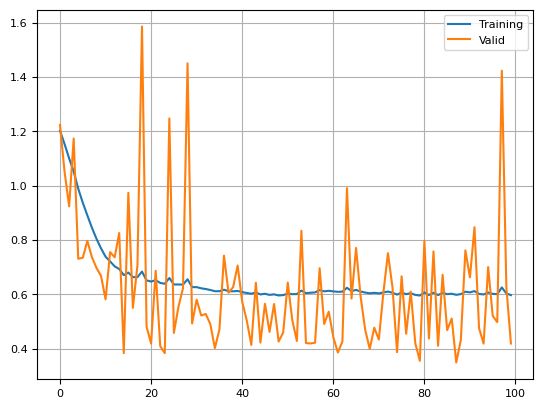

In [24]:
plt.plot(my_NN_training_loss, label="Training")
plt.plot(my_NN_validating_loss, label="Valid")
plt.legend()
plt.grid()
plt.savefig("MyNN_Training.png", bbox_inches='tight' )
plt.show()

### Loading Epoch

In [25]:
import numpy as np
ep = np.argmin(my_NN_validating_loss) 
print("Best ep = %d"% ep)

model_name = 'weights/weight_%03d.pt' % ep
myLinearModel = MyNN(in_features=in_features, outfeatures=out_features)
myLinearModel.load_state_dict(torch.load(model_name)['state_dict'])
myLinearModel = myLinearModel.to(device).eval()

Best ep = 87


### Testing

In [26]:
testLoader = DataLoader(TestingData, batch_size=1, shuffle=False)
pbar = tqdm(testLoader)
av_test_loss = 0
for i, (X, y_gt) in enumerate(pbar):  
    X              = X.to(device)
    y_gt           = y_gt.to(device)
    with torch.no_grad(): 
        y_pred         = myLinearModel(X) 
    loss               = myLinearModel.mseloss(y_pred, y_gt) 
    av_test_loss += loss.item()

    pbar.set_description("[EP%d][%d] TEST Av. Loss = %0.2f" % (ep, i, av_test_loss/(i + 1)))

[EP87][291] TEST Av. Loss = 0.73: 100%|██████████| 292/292 [00:00<00:00, 2435.47it/s]


# Bayesian Neural Network

- Let's assume that the weights and biases are sampled from Gaussian distribution. 

- We assume that the prior of the weights are from Gaussian mixture (following the paper 'Weight Uncertainty Neural Network' JMRL 2018)

- Then, the configuration for BNN follows:

    - Customize a new layer, called `BayesianLinearLayer`

    - Putting the new layers in `BayesianLinearModel` which is built on `torch.nn.module`

    - The main difference to standard NN is the additional part of `sampling` and `log-probability` calculation.

### Gaussian object

In [27]:
import torch.nn.functional as F
import math

class Gaussian(object):
    def __init__(self, mu, rho):
        super().__init__()
        self.mu = mu
        self.rho = rho
        self.normal = torch.distributions.Normal(0,1)
    
    @property
    def sigma(self):
        return torch.log1p(torch.exp(self.rho))
    
    def sample(self):
        epsilon = self.normal.sample(self.rho.size()).to(device)
        return self.mu + self.sigma * epsilon
    
    def log_prob(self, input):
        return (-math.log(math.sqrt(2 * math.pi)) - torch.log(self.sigma) - ((input - self.mu) ** 2) / (2 * self.sigma ** 2)).sum()

### Gaussian Mixture for weight prior

In [28]:
class ScaleMixtureGaussian(object):
    def __init__(self, pi, sigma1, sigma2):
        super().__init__()
        self.pi = pi
        self.sigma1 = sigma1
        self.sigma2 = sigma2
        self.gaussian1 = torch.distributions.Normal(0,sigma1)
        self.gaussian2 = torch.distributions.Normal(0,sigma2)
    
    def log_prob(self, input):
        prob1 = torch.exp(self.gaussian1.log_prob(input))
        prob2 = torch.exp(self.gaussian2.log_prob(input))
        return (torch.log(self.pi * prob1 + (1-self.pi) * prob2)).sum()

### Bayesian Linear Layer

In [29]:
class BayesianLinearLayer(nn.Module):
    def __init__(self, pi, sigma1, sigma2, in_features=16, out_features=16):
        super().__init__() 
        self.in_features = in_features
        self.out_features = out_features

        # Weight parameters
        self.weight_mu  = nn.Parameter(torch.Tensor(out_features, in_features).uniform_(-0.2, 0.2))
        self.weight_rho = nn.Parameter(torch.Tensor(out_features, in_features).uniform_(-5,-4))
        self.weight     = Gaussian(self.weight_mu, self.weight_rho)
        
        # Bias parameters
        self.bias_mu  = nn.Parameter(torch.Tensor(out_features).uniform_(-0.2, 0.2))
        self.bias_rho = nn.Parameter(torch.Tensor(out_features).uniform_(-5,-4))
        self.bias     = Gaussian(self.bias_mu, self.bias_rho) 

        self.log_prior = 0
        self.log_variational_posterior = 0

        # Define prior for parameters 
        self.weight_prior = ScaleMixtureGaussian(pi, sigma1, sigma2)
        self.bias_prior   = ScaleMixtureGaussian(pi, sigma1, sigma2)

    def forward(self, input, sample=False):
        
        if sample == True: 
            weight = self.weight.sample()
            bias = self.bias.sample()

            self.log_prior_W             = self.weight_prior.log_prob(weight)  +  self.bias_prior.log_prob(bias)  
            self.log_q_posterior         = self.weight.log_prob(weight)        +  self.bias.log_prob(bias) 

        else:
            weight = self.weight.mu
            bias = self.bias.mu

        return F.linear(input, weight, bias) 

### Bayesian Linear Model

In [30]:
import torch
import torch.nn as nn 
import math

class BayesianLinearModel(nn.Module):
    def __init__(self, in_features=10, out_features=1): 
        super().__init__()
        pi = 0.5
        sigma1 = torch.Tensor([math.exp(-0)]).to(device)
        sigma2 = torch.Tensor([math.exp(-1)]).to(device) 

        self.fc1 = BayesianLinearLayer(pi, sigma1, sigma2, in_features=in_features, out_features=64)   # nn.Linear(in_features,16)
        self.fc2 = BayesianLinearLayer(pi, sigma1, sigma2, in_features=64, out_features=32)  # nn.Linear(16, out_features)
        self.fc3 = BayesianLinearLayer(pi, sigma1, sigma2, in_features=32, out_features=24)  # nn.Linear(16, out_features)
        self.fc4 = BayesianLinearLayer(pi, sigma1, sigma2, in_features=24, out_features=out_features)  # nn.Linear(16, out_features)
        self.fc5 = nn.Sigmoid() 
        
        self.loss = nn.MSELoss() 

    def forward(self, x, sample=False):
        x = self.fc1(x, sample=sample)
        x = self.fc2(x, sample=sample)
        x = self.fc3(x, sample=sample)
        x = self.fc4(x, sample=sample)
        y = self.fc5(x) 
        return y
    
    def log_prior(self):
        return self.fc1.log_prior_W + self.fc2.log_prior_W  + self.fc3.log_prior_W  + self.fc4.log_prior_W 
    
    def log_q_posterior(self):
        return self.fc1.log_q_posterior + self.fc2.log_q_posterior + self.fc3.log_q_posterior + self.fc4.log_q_posterior

    def neglog_prob(self, y_pred, y_target):
        math_pi = math.pi 
        sigma = torch.norm(y_pred - y_target,p=2)
        return -(-math.log(math.sqrt(2 * math_pi)) - torch.log(sigma) - ((y_pred - y_target) ** 2) / (2 * sigma**2)).sum()  
    
    def mseloss(self, y_predict, y_gt):
        loss = self.loss(y_predict, y_gt)   
        return loss 

    def ELBO_loss(self,  input, target, num_samples=1): 
        b, cl = target.shape

        outputs                    = torch.zeros(num_samples, b, cl).to(device)
        log_priors                 = torch.zeros(num_samples).to(device)
        log_q_posterior            = torch.zeros(num_samples).to(device)

        for i in range(num_samples):
            outputs[i]                    = self(input, sample=True) # Call 'forward(self, x, sample=False)'
            log_priors[i]                 = self.log_prior()
            log_q_posterior[i]            = self.log_q_posterior()
        
        log_prior                          = log_priors.mean()
        log_q_posterior                    = log_q_posterior.mean()
        average_output                     = outputs #.mean(dim=0)  
        negative_log_likelihood            = self.neglog_prob(average_output, target)/num_samples
        loss                               = negative_log_likelihood -  (log_q_posterior + log_prior)/b 
        return loss, outputs


## Training BNN

In [31]:
import torch.optim as optim

in_features  = 10
out_features = 1

 

os.makedirs("BNN_weights", exist_ok=True)

## Initialize the model
myBNN_Model = BayesianLinearModel(in_features=in_features, out_features=out_features)
myBNN_Model = myBNN_Model.to(device)
## Set the optimizer for training.
optimizer  = optim.Adam(myBNN_Model.parameters(), lr=learning_rate)

In [32]:
my_BNN_training_loss = []
my_BNN_training_MSE = []
my_BNN_validating_loss = []
my_BNN_MSE_inv_error = []
 

num_train_samples = 50
num_test_samples = 50
MSEloss = nn.MSELoss() 
 
 
for ep in range(num_epoch): 


    av_training_loss = 0
    av_mse_train_sum = 0
    av_mse_error_sum = 0
    av_mse_inv_error = 0


    training_dataloader = DataLoader(TrainData, batch_size=batch_size, shuffle=True)
    pbar  = tqdm(training_dataloader)

    # Setting model for training
    myBNN_Model.train()
    for i, (X, y_gt) in enumerate(pbar):  

        X              = X.to(device)
        y_gt           = y_gt.to(device)
                
        myBNN_Model.zero_grad() 
        loss, outputs_temp    = myBNN_Model.ELBO_loss(X, y_gt, num_samples=num_train_samples)
        
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize parameters

        
        av_training_loss += loss.item()
        av_training = av_training_loss/(i+1)  

        outputs_list_arr = outputs_temp.mean(dim=0).view(-1,1)  
        mse_error        = MSEloss(outputs_list_arr, y_gt) 
        av_mse_train_sum += mse_error.item() 
        av_mse_train     = av_mse_train_sum/(i+1) 

        pbar.set_description("[EP%d][%d] TRAIN Av. Loss = %0.2f (MSE= %0.2f)" % (ep, i, av_training, av_mse_train))

    my_BNN_training_loss.append(av_training)
    my_BNN_training_MSE.append(av_mse_train)


    state = {
        'epoch': ep,
        'state_dict': myBNN_Model.state_dict(),
        'optimizer': optimizer.state_dict(),
        'train_loss':av_training 
        }

    if ep % 1  == 0: 
        PATH =  'BNN_weights/bnn_weight_%03d.pt' % ep   
        torch.save(state, PATH) 
        print('Saved model iteration' +  str(ep) + 'to -> ' + PATH)

    # Setting model for validating 
    valid_dataloader = DataLoader(ValidData, batch_size=batch_size, shuffle=True)
    pbar  = tqdm(valid_dataloader)
    
    myBNN_Model.eval()
    correct = 0
    corrects = np.zeros(num_test_samples+1, dtype=int)

    
    for i, (X, y_gt) in enumerate(pbar):  

        X              = X.to(device)
        y_gt           = y_gt.to(device)

        b, cl = y_gt.shape 
        outputs_list = [] 
        with torch.no_grad():
            for i_sample in range(num_test_samples):
                outputs_temp  = myBNN_Model(X, sample=True)  
                outputs_list.append(outputs_temp) 

            outputs_temp = myBNN_Model(X, sample=False) 
            outputs_list.append(outputs_temp) 
 
        outputs_list_arr = torch.stack(outputs_list, dim=0) 
        y_pred = outputs_list_arr.mean(dim=0).view(-1,1)    
 
        mse_error  = MSEloss(y_pred, y_gt) 
 
        av_mse_error_sum += mse_error.item() 
        av_mse_error      = av_mse_error_sum/(i+1)  
        pbar.set_description("-----[%d] VALID Av. Loss = %0.2f" % ( i, av_mse_error))  

    print("Training ERROR %0.2f Valid ERROR: %0.2f" %(av_training, av_mse_error))

    my_BNN_validating_loss.append(av_mse_error) 

[EP0][14] TRAIN Av. Loss = 152.21 (MSE= 1.24): 100%|██████████| 15/15 [00:03<00:00,  4.70it/s]


Saved model iteration0to -> BNN_weights/bnn_weight_000.pt


-----[3] VALID Av. Loss = 1.28: 100%|██████████| 4/4 [00:00<00:00, 11.39it/s]


Training ERROR 152.21 Valid ERROR: 1.28


[EP1][14] TRAIN Av. Loss = 151.08 (MSE= 1.19): 100%|██████████| 15/15 [00:02<00:00,  5.06it/s]


Saved model iteration1to -> BNN_weights/bnn_weight_001.pt


-----[3] VALID Av. Loss = 1.20: 100%|██████████| 4/4 [00:00<00:00, 11.72it/s]


Training ERROR 151.08 Valid ERROR: 1.20


[EP2][14] TRAIN Av. Loss = 150.23 (MSE= 1.17): 100%|██████████| 15/15 [00:03<00:00,  5.00it/s]


Saved model iteration2to -> BNN_weights/bnn_weight_002.pt


-----[3] VALID Av. Loss = 1.18: 100%|██████████| 4/4 [00:00<00:00, 11.63it/s]


Training ERROR 150.23 Valid ERROR: 1.18


[EP3][14] TRAIN Av. Loss = 149.02 (MSE= 1.13): 100%|██████████| 15/15 [00:03<00:00,  4.96it/s]


Saved model iteration3to -> BNN_weights/bnn_weight_003.pt


-----[3] VALID Av. Loss = 1.09: 100%|██████████| 4/4 [00:00<00:00, 11.56it/s]


Training ERROR 149.02 Valid ERROR: 1.09


[EP4][14] TRAIN Av. Loss = 147.79 (MSE= 1.08): 100%|██████████| 15/15 [00:03<00:00,  4.85it/s]


Saved model iteration4to -> BNN_weights/bnn_weight_004.pt


-----[3] VALID Av. Loss = 1.07: 100%|██████████| 4/4 [00:00<00:00, 11.50it/s]


Training ERROR 147.79 Valid ERROR: 1.07


[EP5][14] TRAIN Av. Loss = 146.53 (MSE= 1.05): 100%|██████████| 15/15 [00:02<00:00,  5.02it/s]


Saved model iteration5to -> BNN_weights/bnn_weight_005.pt


-----[3] VALID Av. Loss = 1.04: 100%|██████████| 4/4 [00:00<00:00, 11.66it/s]


Training ERROR 146.53 Valid ERROR: 1.04


[EP6][14] TRAIN Av. Loss = 144.62 (MSE= 0.99): 100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


Saved model iteration6to -> BNN_weights/bnn_weight_006.pt


-----[3] VALID Av. Loss = 1.01: 100%|██████████| 4/4 [00:00<00:00, 11.55it/s]


Training ERROR 144.62 Valid ERROR: 1.01


[EP7][14] TRAIN Av. Loss = 143.44 (MSE= 0.95): 100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


Saved model iteration7to -> BNN_weights/bnn_weight_007.pt


-----[3] VALID Av. Loss = 0.95: 100%|██████████| 4/4 [00:00<00:00, 11.73it/s]


Training ERROR 143.44 Valid ERROR: 0.95


[EP8][14] TRAIN Av. Loss = 141.81 (MSE= 0.90): 100%|██████████| 15/15 [00:03<00:00,  4.92it/s]


Saved model iteration8to -> BNN_weights/bnn_weight_008.pt


-----[3] VALID Av. Loss = 0.94: 100%|██████████| 4/4 [00:00<00:00, 11.55it/s]


Training ERROR 141.81 Valid ERROR: 0.94


[EP9][14] TRAIN Av. Loss = 140.32 (MSE= 0.86): 100%|██████████| 15/15 [00:02<00:00,  5.06it/s]


Saved model iteration9to -> BNN_weights/bnn_weight_009.pt


-----[3] VALID Av. Loss = 0.88: 100%|██████████| 4/4 [00:00<00:00, 11.40it/s]


Training ERROR 140.32 Valid ERROR: 0.88


[EP10][14] TRAIN Av. Loss = 138.48 (MSE= 0.83): 100%|██████████| 15/15 [00:02<00:00,  5.11it/s]


Saved model iteration10to -> BNN_weights/bnn_weight_010.pt


-----[3] VALID Av. Loss = 0.83: 100%|██████████| 4/4 [00:00<00:00, 12.11it/s]


Training ERROR 138.48 Valid ERROR: 0.83


[EP11][14] TRAIN Av. Loss = 137.58 (MSE= 0.80): 100%|██████████| 15/15 [00:02<00:00,  5.15it/s]


Saved model iteration11to -> BNN_weights/bnn_weight_011.pt


-----[3] VALID Av. Loss = 0.85: 100%|██████████| 4/4 [00:00<00:00, 11.55it/s]


Training ERROR 137.58 Valid ERROR: 0.85


[EP12][14] TRAIN Av. Loss = 136.41 (MSE= 0.77): 100%|██████████| 15/15 [00:02<00:00,  5.06it/s]


Saved model iteration12to -> BNN_weights/bnn_weight_012.pt


-----[3] VALID Av. Loss = 0.82: 100%|██████████| 4/4 [00:00<00:00, 11.80it/s]


Training ERROR 136.41 Valid ERROR: 0.82


[EP13][14] TRAIN Av. Loss = 135.42 (MSE= 0.74): 100%|██████████| 15/15 [00:02<00:00,  5.11it/s]


Saved model iteration13to -> BNN_weights/bnn_weight_013.pt


-----[3] VALID Av. Loss = 0.84: 100%|██████████| 4/4 [00:00<00:00, 11.56it/s]


Training ERROR 135.42 Valid ERROR: 0.84


[EP14][14] TRAIN Av. Loss = 134.14 (MSE= 0.73): 100%|██████████| 15/15 [00:02<00:00,  5.17it/s]


Saved model iteration14to -> BNN_weights/bnn_weight_014.pt


-----[3] VALID Av. Loss = 0.76: 100%|██████████| 4/4 [00:00<00:00, 11.63it/s]


Training ERROR 134.14 Valid ERROR: 0.76


[EP15][14] TRAIN Av. Loss = 133.91 (MSE= 0.71): 100%|██████████| 15/15 [00:02<00:00,  5.05it/s]


Saved model iteration15to -> BNN_weights/bnn_weight_015.pt


-----[3] VALID Av. Loss = 0.78: 100%|██████████| 4/4 [00:00<00:00, 11.46it/s]


Training ERROR 133.91 Valid ERROR: 0.78


[EP16][14] TRAIN Av. Loss = 132.53 (MSE= 0.70): 100%|██████████| 15/15 [00:02<00:00,  5.04it/s]


Saved model iteration16to -> BNN_weights/bnn_weight_016.pt


-----[3] VALID Av. Loss = 0.73: 100%|██████████| 4/4 [00:00<00:00, 11.91it/s]


Training ERROR 132.53 Valid ERROR: 0.73


[EP17][14] TRAIN Av. Loss = 132.47 (MSE= 0.69): 100%|██████████| 15/15 [00:03<00:00,  4.95it/s]


Saved model iteration17to -> BNN_weights/bnn_weight_017.pt


-----[3] VALID Av. Loss = 0.71: 100%|██████████| 4/4 [00:00<00:00, 11.70it/s]


Training ERROR 132.47 Valid ERROR: 0.71


[EP18][14] TRAIN Av. Loss = 131.63 (MSE= 0.68): 100%|██████████| 15/15 [00:02<00:00,  5.11it/s]


Saved model iteration18to -> BNN_weights/bnn_weight_018.pt


-----[3] VALID Av. Loss = 0.70: 100%|██████████| 4/4 [00:00<00:00, 11.57it/s]


Training ERROR 131.63 Valid ERROR: 0.70


[EP19][14] TRAIN Av. Loss = 131.66 (MSE= 0.67): 100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


Saved model iteration19to -> BNN_weights/bnn_weight_019.pt


-----[3] VALID Av. Loss = 0.70: 100%|██████████| 4/4 [00:00<00:00, 11.55it/s]


Training ERROR 131.66 Valid ERROR: 0.70


[EP20][14] TRAIN Av. Loss = 130.87 (MSE= 0.67): 100%|██████████| 15/15 [00:03<00:00,  4.96it/s]


Saved model iteration20to -> BNN_weights/bnn_weight_020.pt


-----[3] VALID Av. Loss = 0.69: 100%|██████████| 4/4 [00:00<00:00, 11.48it/s]


Training ERROR 130.87 Valid ERROR: 0.69


[EP21][14] TRAIN Av. Loss = 130.61 (MSE= 0.66): 100%|██████████| 15/15 [00:02<00:00,  5.05it/s]


Saved model iteration21to -> BNN_weights/bnn_weight_021.pt


-----[3] VALID Av. Loss = 0.69: 100%|██████████| 4/4 [00:00<00:00, 11.43it/s]


Training ERROR 130.61 Valid ERROR: 0.69


[EP22][14] TRAIN Av. Loss = 129.56 (MSE= 0.65): 100%|██████████| 15/15 [00:02<00:00,  5.01it/s]


Saved model iteration22to -> BNN_weights/bnn_weight_022.pt


-----[3] VALID Av. Loss = 0.68: 100%|██████████| 4/4 [00:00<00:00, 11.44it/s]


Training ERROR 129.56 Valid ERROR: 0.68


[EP23][14] TRAIN Av. Loss = 130.14 (MSE= 0.65): 100%|██████████| 15/15 [00:03<00:00,  4.87it/s]


Saved model iteration23to -> BNN_weights/bnn_weight_023.pt


-----[3] VALID Av. Loss = 0.72: 100%|██████████| 4/4 [00:00<00:00, 11.45it/s]


Training ERROR 130.14 Valid ERROR: 0.72


[EP24][14] TRAIN Av. Loss = 128.71 (MSE= 0.65): 100%|██████████| 15/15 [00:02<00:00,  5.00it/s]


Saved model iteration24to -> BNN_weights/bnn_weight_024.pt


-----[3] VALID Av. Loss = 0.66: 100%|██████████| 4/4 [00:00<00:00, 11.59it/s]


Training ERROR 128.71 Valid ERROR: 0.66


[EP25][14] TRAIN Av. Loss = 129.43 (MSE= 0.64): 100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


Saved model iteration25to -> BNN_weights/bnn_weight_025.pt


-----[3] VALID Av. Loss = 0.69: 100%|██████████| 4/4 [00:00<00:00, 11.52it/s]


Training ERROR 129.43 Valid ERROR: 0.69


[EP26][14] TRAIN Av. Loss = 128.96 (MSE= 0.64): 100%|██████████| 15/15 [00:03<00:00,  4.99it/s]


Saved model iteration26to -> BNN_weights/bnn_weight_026.pt


-----[3] VALID Av. Loss = 0.68: 100%|██████████| 4/4 [00:00<00:00, 11.40it/s]


Training ERROR 128.96 Valid ERROR: 0.68


[EP27][14] TRAIN Av. Loss = 128.33 (MSE= 0.63): 100%|██████████| 15/15 [00:02<00:00,  5.01it/s]


Saved model iteration27to -> BNN_weights/bnn_weight_027.pt


-----[3] VALID Av. Loss = 0.64: 100%|██████████| 4/4 [00:00<00:00, 11.36it/s]


Training ERROR 128.33 Valid ERROR: 0.64


[EP28][14] TRAIN Av. Loss = 127.46 (MSE= 0.63): 100%|██████████| 15/15 [00:03<00:00,  4.85it/s]


Saved model iteration28to -> BNN_weights/bnn_weight_028.pt


-----[3] VALID Av. Loss = 0.72: 100%|██████████| 4/4 [00:00<00:00, 11.49it/s]


Training ERROR 127.46 Valid ERROR: 0.72


[EP29][14] TRAIN Av. Loss = 128.01 (MSE= 0.63): 100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


Saved model iteration29to -> BNN_weights/bnn_weight_029.pt


-----[3] VALID Av. Loss = 0.67: 100%|██████████| 4/4 [00:00<00:00, 11.44it/s]


Training ERROR 128.01 Valid ERROR: 0.67


[EP30][14] TRAIN Av. Loss = 127.35 (MSE= 0.63): 100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


Saved model iteration30to -> BNN_weights/bnn_weight_030.pt


-----[3] VALID Av. Loss = 0.63: 100%|██████████| 4/4 [00:00<00:00, 11.56it/s]


Training ERROR 127.35 Valid ERROR: 0.63


[EP31][14] TRAIN Av. Loss = 126.44 (MSE= 0.61): 100%|██████████| 15/15 [00:03<00:00,  4.95it/s]


Saved model iteration31to -> BNN_weights/bnn_weight_031.pt


-----[3] VALID Av. Loss = 0.62: 100%|██████████| 4/4 [00:00<00:00, 11.34it/s]


Training ERROR 126.44 Valid ERROR: 0.62


[EP32][14] TRAIN Av. Loss = 127.04 (MSE= 0.61): 100%|██████████| 15/15 [00:03<00:00,  4.96it/s]


Saved model iteration32to -> BNN_weights/bnn_weight_032.pt


-----[3] VALID Av. Loss = 0.63: 100%|██████████| 4/4 [00:00<00:00, 11.34it/s]


Training ERROR 127.04 Valid ERROR: 0.63


[EP33][14] TRAIN Av. Loss = 127.09 (MSE= 0.63): 100%|██████████| 15/15 [00:03<00:00,  4.76it/s]


Saved model iteration33to -> BNN_weights/bnn_weight_033.pt


-----[3] VALID Av. Loss = 0.67: 100%|██████████| 4/4 [00:00<00:00, 11.47it/s]


Training ERROR 127.09 Valid ERROR: 0.67


[EP34][14] TRAIN Av. Loss = 126.42 (MSE= 0.61): 100%|██████████| 15/15 [00:03<00:00,  4.95it/s]


Saved model iteration34to -> BNN_weights/bnn_weight_034.pt


-----[3] VALID Av. Loss = 0.63: 100%|██████████| 4/4 [00:00<00:00, 11.48it/s]


Training ERROR 126.42 Valid ERROR: 0.63


[EP35][14] TRAIN Av. Loss = 126.26 (MSE= 0.61): 100%|██████████| 15/15 [00:03<00:00,  4.95it/s]


Saved model iteration35to -> BNN_weights/bnn_weight_035.pt


-----[3] VALID Av. Loss = 0.67: 100%|██████████| 4/4 [00:00<00:00, 11.52it/s]


Training ERROR 126.26 Valid ERROR: 0.67


[EP36][14] TRAIN Av. Loss = 126.71 (MSE= 0.61): 100%|██████████| 15/15 [00:03<00:00,  4.92it/s]


Saved model iteration36to -> BNN_weights/bnn_weight_036.pt


-----[3] VALID Av. Loss = 0.68: 100%|██████████| 4/4 [00:00<00:00, 11.42it/s]


Training ERROR 126.71 Valid ERROR: 0.68


[EP37][14] TRAIN Av. Loss = 125.32 (MSE= 0.60): 100%|██████████| 15/15 [00:03<00:00,  4.95it/s]


Saved model iteration37to -> BNN_weights/bnn_weight_037.pt


-----[3] VALID Av. Loss = 0.67: 100%|██████████| 4/4 [00:00<00:00, 11.52it/s]


Training ERROR 125.32 Valid ERROR: 0.67


[EP38][14] TRAIN Av. Loss = 125.51 (MSE= 0.60): 100%|██████████| 15/15 [00:02<00:00,  5.00it/s]


Saved model iteration38to -> BNN_weights/bnn_weight_038.pt


-----[3] VALID Av. Loss = 0.61: 100%|██████████| 4/4 [00:00<00:00, 11.56it/s]


Training ERROR 125.51 Valid ERROR: 0.61


[EP39][14] TRAIN Av. Loss = 125.59 (MSE= 0.61): 100%|██████████| 15/15 [00:03<00:00,  4.92it/s]


Saved model iteration39to -> BNN_weights/bnn_weight_039.pt


-----[3] VALID Av. Loss = 0.61: 100%|██████████| 4/4 [00:00<00:00, 11.44it/s]


Training ERROR 125.59 Valid ERROR: 0.61


[EP40][14] TRAIN Av. Loss = 125.05 (MSE= 0.62): 100%|██████████| 15/15 [00:03<00:00,  4.84it/s]


Saved model iteration40to -> BNN_weights/bnn_weight_040.pt


-----[3] VALID Av. Loss = 0.60: 100%|██████████| 4/4 [00:00<00:00, 11.30it/s]


Training ERROR 125.05 Valid ERROR: 0.60


[EP41][14] TRAIN Av. Loss = 124.87 (MSE= 0.60): 100%|██████████| 15/15 [00:03<00:00,  4.71it/s]


Saved model iteration41to -> BNN_weights/bnn_weight_041.pt


-----[3] VALID Av. Loss = 0.61: 100%|██████████| 4/4 [00:00<00:00, 11.28it/s]


Training ERROR 124.87 Valid ERROR: 0.61


[EP42][14] TRAIN Av. Loss = 125.30 (MSE= 0.63): 100%|██████████| 15/15 [00:03<00:00,  4.94it/s]


Saved model iteration42to -> BNN_weights/bnn_weight_042.pt


-----[3] VALID Av. Loss = 0.63: 100%|██████████| 4/4 [00:00<00:00, 11.49it/s]


Training ERROR 125.30 Valid ERROR: 0.63


[EP43][14] TRAIN Av. Loss = 124.85 (MSE= 0.60): 100%|██████████| 15/15 [00:03<00:00,  4.98it/s]


Saved model iteration43to -> BNN_weights/bnn_weight_043.pt


-----[3] VALID Av. Loss = 0.60: 100%|██████████| 4/4 [00:00<00:00, 11.52it/s]


Training ERROR 124.85 Valid ERROR: 0.60


[EP44][14] TRAIN Av. Loss = 123.81 (MSE= 0.63): 100%|██████████| 15/15 [00:03<00:00,  4.94it/s]


Saved model iteration44to -> BNN_weights/bnn_weight_044.pt


-----[3] VALID Av. Loss = 0.67: 100%|██████████| 4/4 [00:00<00:00, 11.51it/s]


Training ERROR 123.81 Valid ERROR: 0.67


[EP45][14] TRAIN Av. Loss = 123.83 (MSE= 0.59): 100%|██████████| 15/15 [00:02<00:00,  5.03it/s]


Saved model iteration45to -> BNN_weights/bnn_weight_045.pt


-----[3] VALID Av. Loss = 0.61: 100%|██████████| 4/4 [00:00<00:00, 11.37it/s]


Training ERROR 123.83 Valid ERROR: 0.61


[EP46][14] TRAIN Av. Loss = 124.95 (MSE= 0.59): 100%|██████████| 15/15 [00:02<00:00,  5.01it/s]


Saved model iteration46to -> BNN_weights/bnn_weight_046.pt


-----[3] VALID Av. Loss = 0.59: 100%|██████████| 4/4 [00:00<00:00, 11.49it/s]


Training ERROR 124.95 Valid ERROR: 0.59


[EP47][14] TRAIN Av. Loss = 123.99 (MSE= 0.59): 100%|██████████| 15/15 [00:03<00:00,  4.88it/s]


Saved model iteration47to -> BNN_weights/bnn_weight_047.pt


-----[3] VALID Av. Loss = 0.61: 100%|██████████| 4/4 [00:00<00:00, 11.33it/s]


Training ERROR 123.99 Valid ERROR: 0.61


[EP48][14] TRAIN Av. Loss = 124.46 (MSE= 0.59): 100%|██████████| 15/15 [00:03<00:00,  4.85it/s]


Saved model iteration48to -> BNN_weights/bnn_weight_048.pt


-----[3] VALID Av. Loss = 0.62: 100%|██████████| 4/4 [00:00<00:00, 11.53it/s]


Training ERROR 124.46 Valid ERROR: 0.62


[EP49][14] TRAIN Av. Loss = 124.52 (MSE= 0.59): 100%|██████████| 15/15 [00:03<00:00,  4.92it/s]


Saved model iteration49to -> BNN_weights/bnn_weight_049.pt


-----[3] VALID Av. Loss = 0.59: 100%|██████████| 4/4 [00:00<00:00, 11.31it/s]


Training ERROR 124.52 Valid ERROR: 0.59


[EP50][14] TRAIN Av. Loss = 124.08 (MSE= 0.59): 100%|██████████| 15/15 [00:03<00:00,  4.93it/s]


Saved model iteration50to -> BNN_weights/bnn_weight_050.pt


-----[3] VALID Av. Loss = 0.59: 100%|██████████| 4/4 [00:00<00:00, 11.83it/s]


Training ERROR 124.08 Valid ERROR: 0.59


[EP51][14] TRAIN Av. Loss = 124.52 (MSE= 0.59): 100%|██████████| 15/15 [00:02<00:00,  5.08it/s]


Saved model iteration51to -> BNN_weights/bnn_weight_051.pt


-----[3] VALID Av. Loss = 0.63: 100%|██████████| 4/4 [00:00<00:00, 11.52it/s]


Training ERROR 124.52 Valid ERROR: 0.63


[EP52][14] TRAIN Av. Loss = 123.96 (MSE= 0.59): 100%|██████████| 15/15 [00:02<00:00,  5.07it/s]


Saved model iteration52to -> BNN_weights/bnn_weight_052.pt


-----[3] VALID Av. Loss = 0.64: 100%|██████████| 4/4 [00:00<00:00, 11.77it/s]


Training ERROR 123.96 Valid ERROR: 0.64


[EP53][14] TRAIN Av. Loss = 123.84 (MSE= 0.58): 100%|██████████| 15/15 [00:03<00:00,  4.89it/s]


Saved model iteration53to -> BNN_weights/bnn_weight_053.pt


-----[3] VALID Av. Loss = 0.59: 100%|██████████| 4/4 [00:00<00:00, 11.88it/s]


Training ERROR 123.84 Valid ERROR: 0.59


[EP54][14] TRAIN Av. Loss = 122.97 (MSE= 0.59): 100%|██████████| 15/15 [00:02<00:00,  5.14it/s]


Saved model iteration54to -> BNN_weights/bnn_weight_054.pt


-----[3] VALID Av. Loss = 0.61: 100%|██████████| 4/4 [00:00<00:00, 11.76it/s]


Training ERROR 122.97 Valid ERROR: 0.61


[EP55][14] TRAIN Av. Loss = 123.07 (MSE= 0.59): 100%|██████████| 15/15 [00:02<00:00,  5.09it/s]


Saved model iteration55to -> BNN_weights/bnn_weight_055.pt


-----[3] VALID Av. Loss = 0.60: 100%|██████████| 4/4 [00:00<00:00, 11.64it/s]


Training ERROR 123.07 Valid ERROR: 0.60


[EP56][14] TRAIN Av. Loss = 123.28 (MSE= 0.60): 100%|██████████| 15/15 [00:02<00:00,  5.11it/s]


Saved model iteration56to -> BNN_weights/bnn_weight_056.pt


-----[3] VALID Av. Loss = 0.62: 100%|██████████| 4/4 [00:00<00:00, 11.76it/s]


Training ERROR 123.28 Valid ERROR: 0.62


[EP57][14] TRAIN Av. Loss = 123.48 (MSE= 0.58): 100%|██████████| 15/15 [00:03<00:00,  4.99it/s]


Saved model iteration57to -> BNN_weights/bnn_weight_057.pt


-----[3] VALID Av. Loss = 0.60: 100%|██████████| 4/4 [00:00<00:00, 11.72it/s]


Training ERROR 123.48 Valid ERROR: 0.60


[EP58][14] TRAIN Av. Loss = 123.19 (MSE= 0.59): 100%|██████████| 15/15 [00:02<00:00,  5.09it/s]


Saved model iteration58to -> BNN_weights/bnn_weight_058.pt


-----[3] VALID Av. Loss = 0.64: 100%|██████████| 4/4 [00:00<00:00, 11.64it/s]


Training ERROR 123.19 Valid ERROR: 0.64


[EP59][14] TRAIN Av. Loss = 123.00 (MSE= 0.60): 100%|██████████| 15/15 [00:02<00:00,  5.05it/s]


Saved model iteration59to -> BNN_weights/bnn_weight_059.pt


-----[3] VALID Av. Loss = 0.60: 100%|██████████| 4/4 [00:00<00:00, 11.80it/s]


Training ERROR 123.00 Valid ERROR: 0.60


[EP60][14] TRAIN Av. Loss = 123.37 (MSE= 0.59): 100%|██████████| 15/15 [00:02<00:00,  5.10it/s]


Saved model iteration60to -> BNN_weights/bnn_weight_060.pt


-----[3] VALID Av. Loss = 0.58: 100%|██████████| 4/4 [00:00<00:00, 11.27it/s]


Training ERROR 123.37 Valid ERROR: 0.58


[EP61][14] TRAIN Av. Loss = 123.43 (MSE= 0.59): 100%|██████████| 15/15 [00:02<00:00,  5.14it/s]


Saved model iteration61to -> BNN_weights/bnn_weight_061.pt


-----[3] VALID Av. Loss = 0.60: 100%|██████████| 4/4 [00:00<00:00, 11.75it/s]


Training ERROR 123.43 Valid ERROR: 0.60


[EP62][14] TRAIN Av. Loss = 122.80 (MSE= 0.58): 100%|██████████| 15/15 [00:02<00:00,  5.15it/s]


Saved model iteration62to -> BNN_weights/bnn_weight_062.pt


-----[3] VALID Av. Loss = 0.60: 100%|██████████| 4/4 [00:00<00:00, 11.75it/s]


Training ERROR 122.80 Valid ERROR: 0.60


[EP63][14] TRAIN Av. Loss = 122.93 (MSE= 0.59): 100%|██████████| 15/15 [00:02<00:00,  5.08it/s]


Saved model iteration63to -> BNN_weights/bnn_weight_063.pt


-----[3] VALID Av. Loss = 0.66: 100%|██████████| 4/4 [00:00<00:00, 11.64it/s]


Training ERROR 122.93 Valid ERROR: 0.66


[EP64][14] TRAIN Av. Loss = 121.95 (MSE= 0.59): 100%|██████████| 15/15 [00:02<00:00,  5.10it/s]


Saved model iteration64to -> BNN_weights/bnn_weight_064.pt


-----[3] VALID Av. Loss = 0.58: 100%|██████████| 4/4 [00:00<00:00, 11.63it/s]


Training ERROR 121.95 Valid ERROR: 0.58


[EP65][14] TRAIN Av. Loss = 121.75 (MSE= 0.59): 100%|██████████| 15/15 [00:02<00:00,  5.11it/s]


Saved model iteration65to -> BNN_weights/bnn_weight_065.pt


-----[3] VALID Av. Loss = 0.63: 100%|██████████| 4/4 [00:00<00:00, 11.64it/s]


Training ERROR 121.75 Valid ERROR: 0.63


[EP66][14] TRAIN Av. Loss = 123.12 (MSE= 0.59): 100%|██████████| 15/15 [00:03<00:00,  4.96it/s]


Saved model iteration66to -> BNN_weights/bnn_weight_066.pt


-----[3] VALID Av. Loss = 0.59: 100%|██████████| 4/4 [00:00<00:00, 11.70it/s]


Training ERROR 123.12 Valid ERROR: 0.59


[EP67][14] TRAIN Av. Loss = 122.10 (MSE= 0.62): 100%|██████████| 15/15 [00:02<00:00,  5.15it/s]


Saved model iteration67to -> BNN_weights/bnn_weight_067.pt


-----[3] VALID Av. Loss = 0.59: 100%|██████████| 4/4 [00:00<00:00, 11.80it/s]


Training ERROR 122.10 Valid ERROR: 0.59


[EP68][14] TRAIN Av. Loss = 122.08 (MSE= 0.58): 100%|██████████| 15/15 [00:02<00:00,  5.14it/s]


Saved model iteration68to -> BNN_weights/bnn_weight_068.pt


-----[3] VALID Av. Loss = 0.58: 100%|██████████| 4/4 [00:00<00:00, 11.76it/s]


Training ERROR 122.08 Valid ERROR: 0.58


[EP69][14] TRAIN Av. Loss = 121.80 (MSE= 0.58): 100%|██████████| 15/15 [00:02<00:00,  5.15it/s]


Saved model iteration69to -> BNN_weights/bnn_weight_069.pt


-----[3] VALID Av. Loss = 0.58: 100%|██████████| 4/4 [00:00<00:00, 11.70it/s]


Training ERROR 121.80 Valid ERROR: 0.58


[EP70][14] TRAIN Av. Loss = 120.72 (MSE= 0.58): 100%|██████████| 15/15 [00:02<00:00,  5.11it/s]


Saved model iteration70to -> BNN_weights/bnn_weight_070.pt


-----[3] VALID Av. Loss = 0.59: 100%|██████████| 4/4 [00:00<00:00, 11.77it/s]


Training ERROR 120.72 Valid ERROR: 0.59


[EP71][14] TRAIN Av. Loss = 122.07 (MSE= 0.59): 100%|██████████| 15/15 [00:02<00:00,  5.15it/s]


Saved model iteration71to -> BNN_weights/bnn_weight_071.pt


-----[3] VALID Av. Loss = 0.59: 100%|██████████| 4/4 [00:00<00:00, 11.77it/s]


Training ERROR 122.07 Valid ERROR: 0.59


[EP72][14] TRAIN Av. Loss = 121.87 (MSE= 0.59): 100%|██████████| 15/15 [00:03<00:00,  4.97it/s]


Saved model iteration72to -> BNN_weights/bnn_weight_072.pt


-----[3] VALID Av. Loss = 0.63: 100%|██████████| 4/4 [00:00<00:00, 11.81it/s]


Training ERROR 121.87 Valid ERROR: 0.63


[EP73][14] TRAIN Av. Loss = 122.01 (MSE= 0.60): 100%|██████████| 15/15 [00:02<00:00,  5.12it/s]


Saved model iteration73to -> BNN_weights/bnn_weight_073.pt


-----[3] VALID Av. Loss = 0.63: 100%|██████████| 4/4 [00:00<00:00, 11.74it/s]


Training ERROR 122.01 Valid ERROR: 0.63


[EP74][14] TRAIN Av. Loss = 121.25 (MSE= 0.58): 100%|██████████| 15/15 [00:02<00:00,  5.11it/s]


Saved model iteration74to -> BNN_weights/bnn_weight_074.pt


-----[3] VALID Av. Loss = 0.60: 100%|██████████| 4/4 [00:00<00:00, 11.59it/s]


Training ERROR 121.25 Valid ERROR: 0.60


[EP75][14] TRAIN Av. Loss = 121.44 (MSE= 0.58): 100%|██████████| 15/15 [00:02<00:00,  5.16it/s]


Saved model iteration75to -> BNN_weights/bnn_weight_075.pt


-----[3] VALID Av. Loss = 0.64: 100%|██████████| 4/4 [00:00<00:00, 11.67it/s]


Training ERROR 121.44 Valid ERROR: 0.64


[EP76][14] TRAIN Av. Loss = 121.47 (MSE= 0.59): 100%|██████████| 15/15 [00:02<00:00,  5.12it/s]


Saved model iteration76to -> BNN_weights/bnn_weight_076.pt


-----[3] VALID Av. Loss = 0.58: 100%|██████████| 4/4 [00:00<00:00, 11.71it/s]


Training ERROR 121.47 Valid ERROR: 0.58


[EP77][14] TRAIN Av. Loss = 121.15 (MSE= 0.58): 100%|██████████| 15/15 [00:03<00:00,  4.96it/s]


Saved model iteration77to -> BNN_weights/bnn_weight_077.pt


-----[3] VALID Av. Loss = 0.60: 100%|██████████| 4/4 [00:00<00:00, 11.68it/s]


Training ERROR 121.15 Valid ERROR: 0.60


[EP78][14] TRAIN Av. Loss = 121.21 (MSE= 0.58): 100%|██████████| 15/15 [00:02<00:00,  5.15it/s]


Saved model iteration78to -> BNN_weights/bnn_weight_078.pt


-----[3] VALID Av. Loss = 0.60: 100%|██████████| 4/4 [00:00<00:00, 11.69it/s]


Training ERROR 121.21 Valid ERROR: 0.60


[EP79][14] TRAIN Av. Loss = 121.54 (MSE= 0.59): 100%|██████████| 15/15 [00:02<00:00,  5.13it/s]


Saved model iteration79to -> BNN_weights/bnn_weight_079.pt


-----[3] VALID Av. Loss = 0.63: 100%|██████████| 4/4 [00:00<00:00, 11.72it/s]


Training ERROR 121.54 Valid ERROR: 0.63


[EP80][14] TRAIN Av. Loss = 121.20 (MSE= 0.59): 100%|██████████| 15/15 [00:02<00:00,  5.14it/s]


Saved model iteration80to -> BNN_weights/bnn_weight_080.pt


-----[3] VALID Av. Loss = 0.58: 100%|██████████| 4/4 [00:00<00:00, 11.75it/s]


Training ERROR 121.20 Valid ERROR: 0.58


[EP81][14] TRAIN Av. Loss = 120.44 (MSE= 0.58): 100%|██████████| 15/15 [00:02<00:00,  5.13it/s]


Saved model iteration81to -> BNN_weights/bnn_weight_081.pt


-----[3] VALID Av. Loss = 0.59: 100%|██████████| 4/4 [00:00<00:00, 11.65it/s]


Training ERROR 120.44 Valid ERROR: 0.59


[EP82][14] TRAIN Av. Loss = 120.56 (MSE= 0.59): 100%|██████████| 15/15 [00:03<00:00,  5.00it/s]


Saved model iteration82to -> BNN_weights/bnn_weight_082.pt


-----[3] VALID Av. Loss = 0.58: 100%|██████████| 4/4 [00:00<00:00, 11.74it/s]


Training ERROR 120.56 Valid ERROR: 0.58


[EP83][14] TRAIN Av. Loss = 120.79 (MSE= 0.59): 100%|██████████| 15/15 [00:02<00:00,  5.16it/s]


Saved model iteration83to -> BNN_weights/bnn_weight_083.pt


-----[3] VALID Av. Loss = 0.59: 100%|██████████| 4/4 [00:00<00:00, 11.76it/s]


Training ERROR 120.79 Valid ERROR: 0.59


[EP84][14] TRAIN Av. Loss = 119.68 (MSE= 0.59): 100%|██████████| 15/15 [00:02<00:00,  5.15it/s]


Saved model iteration84to -> BNN_weights/bnn_weight_084.pt


-----[3] VALID Av. Loss = 0.59: 100%|██████████| 4/4 [00:00<00:00, 11.77it/s]


Training ERROR 119.68 Valid ERROR: 0.59


[EP85][14] TRAIN Av. Loss = 120.57 (MSE= 0.59): 100%|██████████| 15/15 [00:02<00:00,  5.16it/s]


Saved model iteration85to -> BNN_weights/bnn_weight_085.pt


-----[3] VALID Av. Loss = 0.58: 100%|██████████| 4/4 [00:00<00:00, 11.71it/s]


Training ERROR 120.57 Valid ERROR: 0.58


[EP86][14] TRAIN Av. Loss = 120.92 (MSE= 0.58): 100%|██████████| 15/15 [00:02<00:00,  5.14it/s]


Saved model iteration86to -> BNN_weights/bnn_weight_086.pt


-----[3] VALID Av. Loss = 0.59: 100%|██████████| 4/4 [00:00<00:00, 11.73it/s]


Training ERROR 120.92 Valid ERROR: 0.59


[EP87][14] TRAIN Av. Loss = 120.66 (MSE= 0.58): 100%|██████████| 15/15 [00:02<00:00,  5.14it/s]


Saved model iteration87to -> BNN_weights/bnn_weight_087.pt


-----[3] VALID Av. Loss = 0.62: 100%|██████████| 4/4 [00:00<00:00, 11.72it/s]


Training ERROR 120.66 Valid ERROR: 0.62


[EP88][14] TRAIN Av. Loss = 120.34 (MSE= 0.59): 100%|██████████| 15/15 [00:02<00:00,  5.16it/s]


Saved model iteration88to -> BNN_weights/bnn_weight_088.pt


-----[3] VALID Av. Loss = 0.59: 100%|██████████| 4/4 [00:00<00:00, 11.70it/s]


Training ERROR 120.34 Valid ERROR: 0.59


[EP89][14] TRAIN Av. Loss = 120.08 (MSE= 0.58): 100%|██████████| 15/15 [00:02<00:00,  5.15it/s]


Saved model iteration89to -> BNN_weights/bnn_weight_089.pt


-----[3] VALID Av. Loss = 0.59: 100%|██████████| 4/4 [00:00<00:00, 11.79it/s]


Training ERROR 120.08 Valid ERROR: 0.59


[EP90][14] TRAIN Av. Loss = 119.45 (MSE= 0.59): 100%|██████████| 15/15 [00:02<00:00,  5.07it/s]


Saved model iteration90to -> BNN_weights/bnn_weight_090.pt


-----[3] VALID Av. Loss = 0.60: 100%|██████████| 4/4 [00:00<00:00, 11.91it/s]


Training ERROR 119.45 Valid ERROR: 0.60


[EP91][14] TRAIN Av. Loss = 119.59 (MSE= 0.59): 100%|██████████| 15/15 [00:02<00:00,  5.18it/s]


Saved model iteration91to -> BNN_weights/bnn_weight_091.pt


-----[3] VALID Av. Loss = 0.63: 100%|██████████| 4/4 [00:00<00:00, 11.85it/s]


Training ERROR 119.59 Valid ERROR: 0.63


[EP92][14] TRAIN Av. Loss = 119.05 (MSE= 0.60): 100%|██████████| 15/15 [00:02<00:00,  5.25it/s]


Saved model iteration92to -> BNN_weights/bnn_weight_092.pt


-----[3] VALID Av. Loss = 0.61: 100%|██████████| 4/4 [00:00<00:00, 11.79it/s]


Training ERROR 119.05 Valid ERROR: 0.61


[EP93][14] TRAIN Av. Loss = 120.23 (MSE= 0.58): 100%|██████████| 15/15 [00:02<00:00,  5.21it/s]


Saved model iteration93to -> BNN_weights/bnn_weight_093.pt


-----[3] VALID Av. Loss = 0.59: 100%|██████████| 4/4 [00:00<00:00, 11.80it/s]


Training ERROR 120.23 Valid ERROR: 0.59


[EP94][14] TRAIN Av. Loss = 119.83 (MSE= 0.59): 100%|██████████| 15/15 [00:02<00:00,  5.23it/s]


Saved model iteration94to -> BNN_weights/bnn_weight_094.pt


-----[3] VALID Av. Loss = 0.59: 100%|██████████| 4/4 [00:00<00:00, 11.78it/s]


Training ERROR 119.83 Valid ERROR: 0.59


[EP95][14] TRAIN Av. Loss = 119.40 (MSE= 0.59): 100%|██████████| 15/15 [00:02<00:00,  5.24it/s]


Saved model iteration95to -> BNN_weights/bnn_weight_095.pt


-----[3] VALID Av. Loss = 0.64: 100%|██████████| 4/4 [00:00<00:00, 11.83it/s]


Training ERROR 119.40 Valid ERROR: 0.64


[EP96][14] TRAIN Av. Loss = 118.42 (MSE= 0.58): 100%|██████████| 15/15 [00:03<00:00,  4.97it/s]


Saved model iteration96to -> BNN_weights/bnn_weight_096.pt


-----[3] VALID Av. Loss = 0.59: 100%|██████████| 4/4 [00:00<00:00, 11.73it/s]


Training ERROR 118.42 Valid ERROR: 0.59


[EP97][14] TRAIN Av. Loss = 119.80 (MSE= 0.58): 100%|██████████| 15/15 [00:02<00:00,  5.25it/s]


Saved model iteration97to -> BNN_weights/bnn_weight_097.pt


-----[3] VALID Av. Loss = 0.59: 100%|██████████| 4/4 [00:00<00:00, 11.72it/s]


Training ERROR 119.80 Valid ERROR: 0.59


[EP98][14] TRAIN Av. Loss = 119.30 (MSE= 0.58): 100%|██████████| 15/15 [00:02<00:00,  5.28it/s]


Saved model iteration98to -> BNN_weights/bnn_weight_098.pt


-----[3] VALID Av. Loss = 0.61: 100%|██████████| 4/4 [00:00<00:00, 11.83it/s]


Training ERROR 119.30 Valid ERROR: 0.61


[EP99][14] TRAIN Av. Loss = 119.06 (MSE= 0.58): 100%|██████████| 15/15 [00:02<00:00,  5.24it/s]


Saved model iteration99to -> BNN_weights/bnn_weight_099.pt


-----[3] VALID Av. Loss = 0.58: 100%|██████████| 4/4 [00:00<00:00, 11.65it/s]

Training ERROR 119.06 Valid ERROR: 0.58


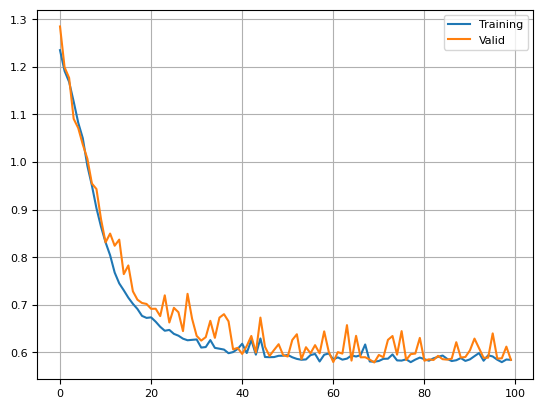

In [33]:
plt.plot(my_BNN_training_MSE, label="Training")
plt.plot(my_BNN_validating_loss, label="Valid")
plt.legend()
plt.grid()
plt.savefig("MyNN_Training.png", bbox_inches='tight' )
plt.show()

### Loading epoch

In [42]:
import numpy as np
ep = np.argmin(my_BNN_validating_loss) 
print("Best ep for BNN %d" % ep)

model_name = 'BNN_weights/bnn_weight_%03d.pt' % ep
myBNN_Model = BayesianLinearModel(in_features=in_features, out_features=out_features)
myBNN_Model.load_state_dict(torch.load(model_name)['state_dict'])
myBNN_Model = myBNN_Model.to(device).eval()

Best ep for BNN 69


In [50]:
testLoader = DataLoader(TestingData, batch_size=1, shuffle=False)
pbar = tqdm(testLoader)
av_test_loss = 0
num_test_samples
for i, (X, y_gt) in enumerate(pbar):  

    X              = X.to(device)
    y_gt           = y_gt.to(device)
    
    outputs_list = []
    with torch.no_grad(): 
        for i_sample in range(num_test_samples):
            outputs_temp  = myBNN_Model(X, sample=True)  
            outputs_list.append(outputs_temp) 

        # outputs_temp = myBNN_Model(X, sample=False) 
        outputs_list.append(outputs_temp) 

    outputs_list_arr = torch.stack(outputs_list, dim=0) 
    y_pred = outputs_list_arr.mean(dim=0).view(-1,1)  
    loss              = myBNN_Model.mseloss(y_pred, y_gt) 
    av_test_loss += loss.item()

    pbar.set_description("[EP%d][%d] TEST Av. Loss = %0.2f" % (ep, i, av_test_loss/(i + 1)))

[EP69][291] TEST Av. Loss = 0.70: 100%|██████████| 292/292 [00:05<00:00, 56.47it/s]


In [51]:
testLoader = DataLoader(TestingData, batch_size=1, shuffle=False)
pbar = tqdm(testLoader)
av_test_loss = 0

for i, (X, y_gt) in enumerate(pbar):  

    X              = X.to(device)
    y_gt           = y_gt.to(device)
    
    with torch.no_grad(): 
        y_pred         = myBNN_Model(X, sample=False) 
    loss              = myBNN_Model.mseloss(y_pred, y_gt) 
    av_test_loss += loss.item()

    pbar.set_description("[EP%d][%d] TEST Av. Loss = %0.2f" % (ep, i, av_test_loss/(i + 1)))

[EP69][291] TEST Av. Loss = 0.70: 100%|██████████| 292/292 [00:00<00:00, 2684.78it/s]
